In [2]:
import pandas as pd
import osmnx as ox
import networkx as nx

In [3]:
Gmpa_KAIST = ox.load_graphml('../read_OSM/KAIST.graphml')
df_request = pd.read_csv('../generate_request/request_data.csv')

In [4]:
Gmpa_KAIST


In [5]:
# 
mapping = dict(zip(Gmpa_KAIST, range(1, len(Gmpa_KAIST.nodes)+1)))
newG = nx.relabel_nodes(Gmpa_KAIST, mapping)

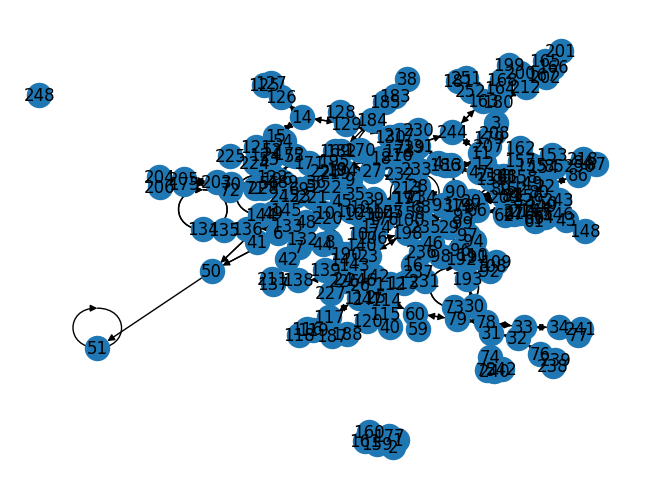

In [6]:
nx.draw(newG, with_labels=True)

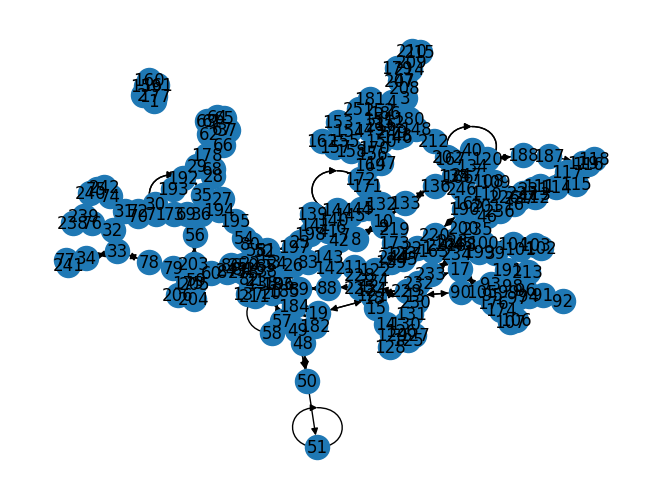

In [7]:
newG.remove_node(248)
nx.draw(newG, with_labels=True)

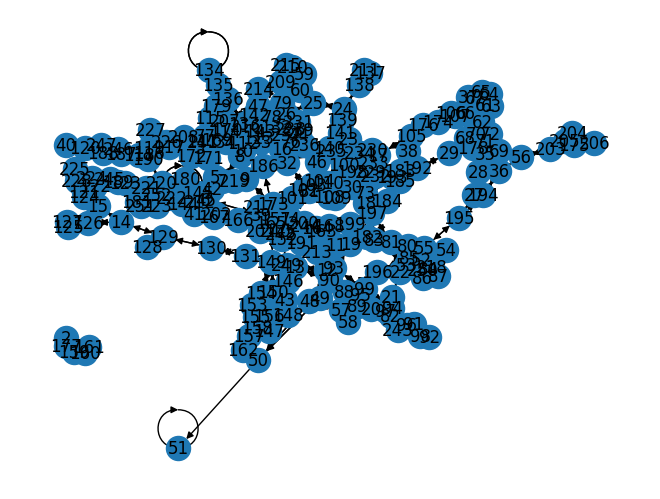

In [8]:
newG.remove_node(1)
nx.draw(newG, with_labels=True)

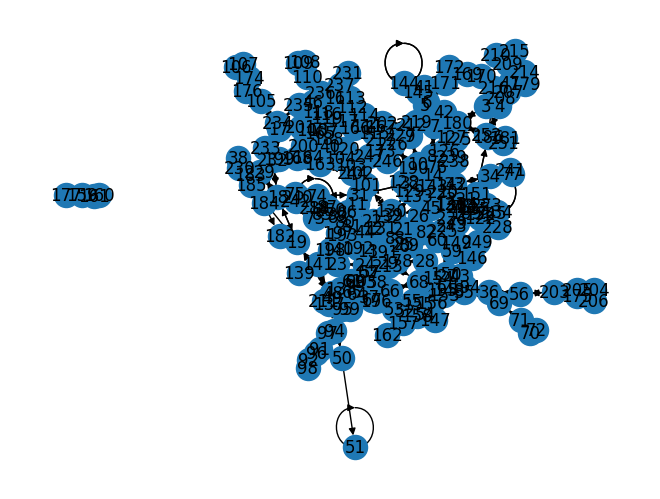

In [9]:
newG.remove_node(2)
nx.draw(newG, with_labels=True)

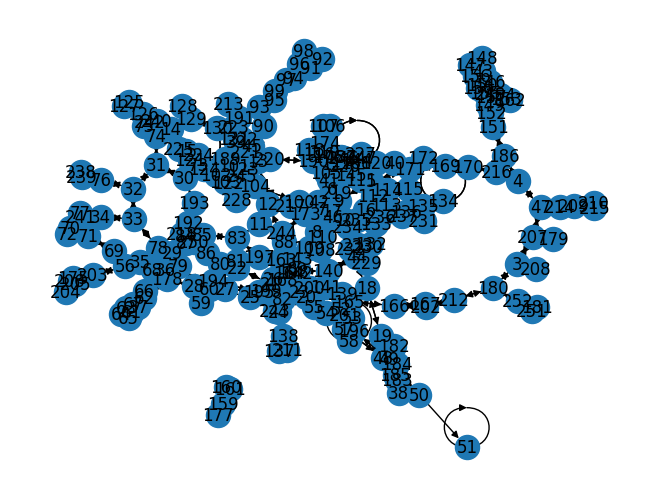

In [11]:
nx.draw(newG, with_labels=True)

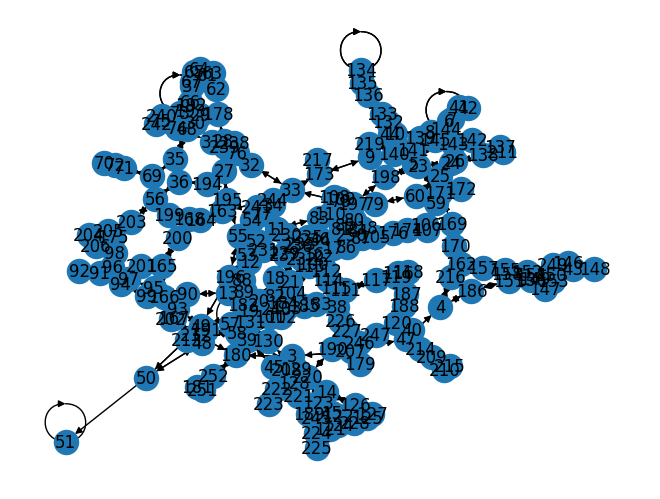

In [12]:
newG.remove_node(177)
newG.remove_node(159)
newG.remove_node(160)
newG.remove_node(161)
nx.draw(newG, with_labels=True)

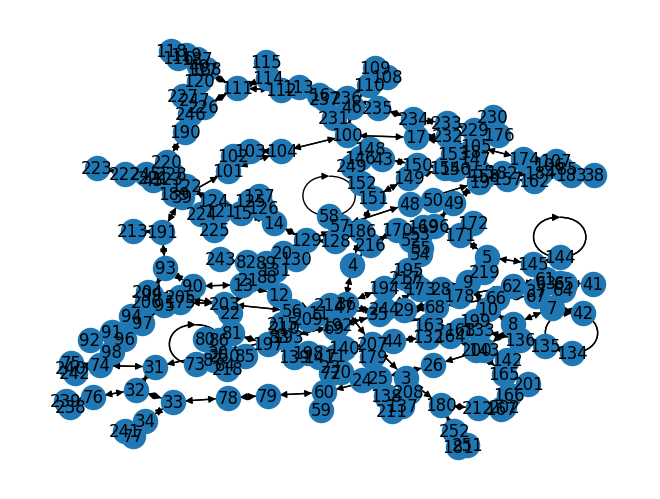

In [13]:
newG.remove_node(51)
nx.draw(newG, with_labels=True)

In [15]:
ox.save_graphml(newG)

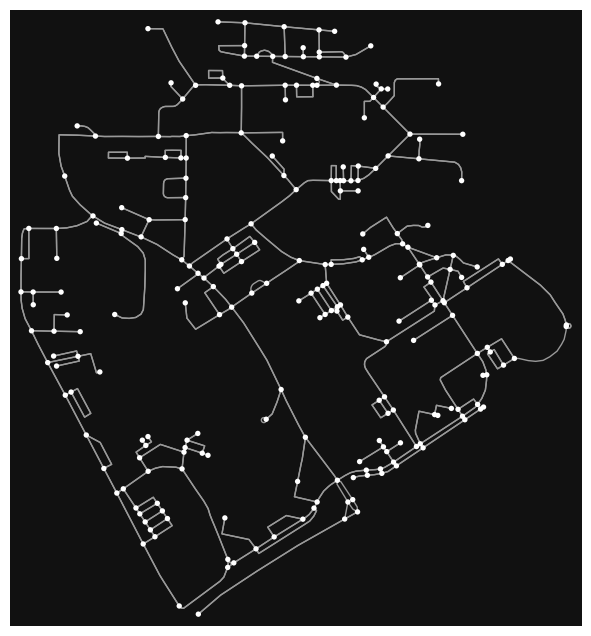

In [16]:
fig, ax = ox.plot_graph(newG)

In [14]:
# for i in newG.nodes:
#     for j in newG.nodes:
#         if i != j:
#             if ox.shortest_path(newG, i, j, weight="length") is None:
#                 print('[',i,',',j,']')

# route = ox.shortest_path(newG, 49, 48, weight="length")

In [17]:
mapping = dict(zip(newG, range(1, len(newG.nodes)+1)))
newGG = nx.relabel_nodes(newG, mapping)


In [22]:
newGG.remove_node(36)
# nx.draw(newG, with_labels=True)

In [28]:
mapping = dict(zip(newG, range(1, len(newG.nodes)+1)))
newGG = nx.relabel_nodes(newG, mapping)


In [29]:
ox.save_graphml(newGG)


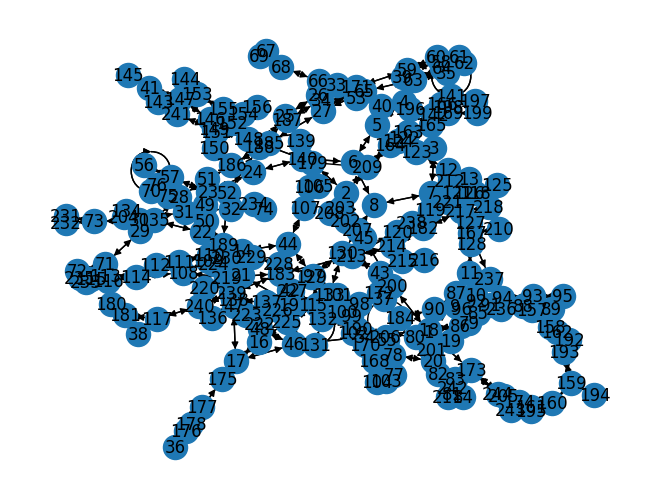

In [30]:
nx.draw(newGG, with_labels=True)

In [31]:
import matplotlib.pyplot as plt

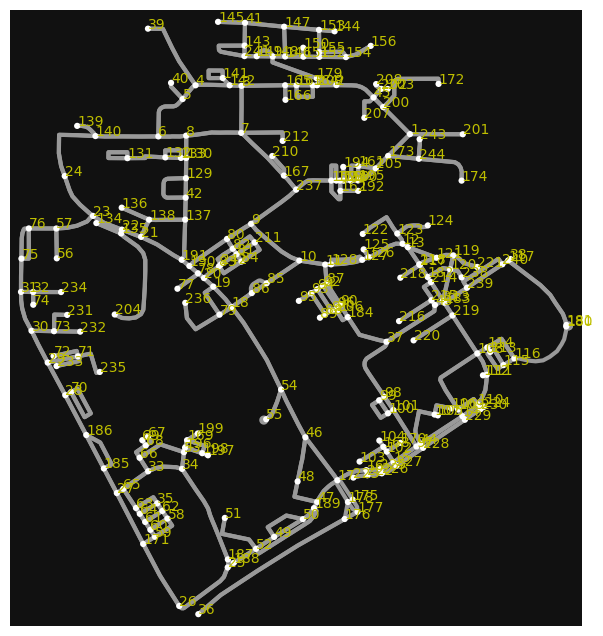

In [32]:
fig, ax = ox.plot_graph(newGG, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(newGG)
for i in range(len(node)):
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()



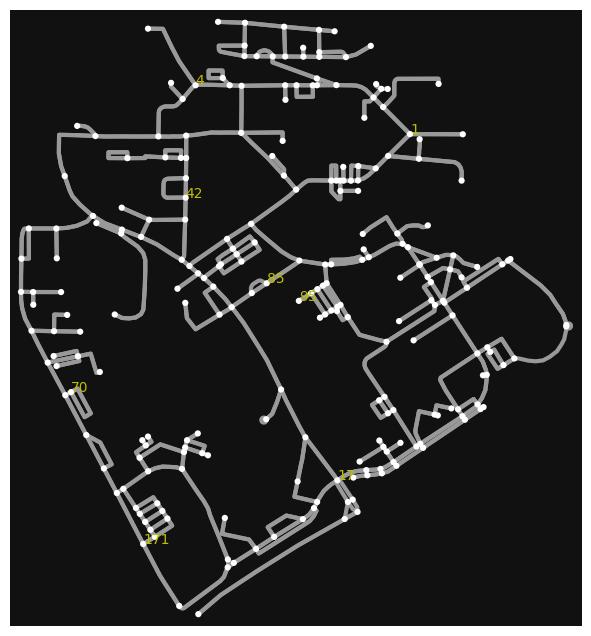

In [34]:
# station 지정
'''
2. Station 지정해주기 <- special node일 뿐
일단 8개로 결정. 창의관, 기계동, 정문, N1, 희망관, 쪽문, 신뢰관, 도서관
Station : staion들의 정보를 모아둔 것.
'''
'''
창의관(85), 기계공학동(42), 정문(17), N1(1), 희망관(70), 쪽문(171), 신뢰관(4) - 기혼자숙소앞으로 변경
도서관(95)

'''

fig, ax = ox.plot_graph(newGG, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(newGG)
for i in [84,41,16,0,69,170,3,94]:
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()






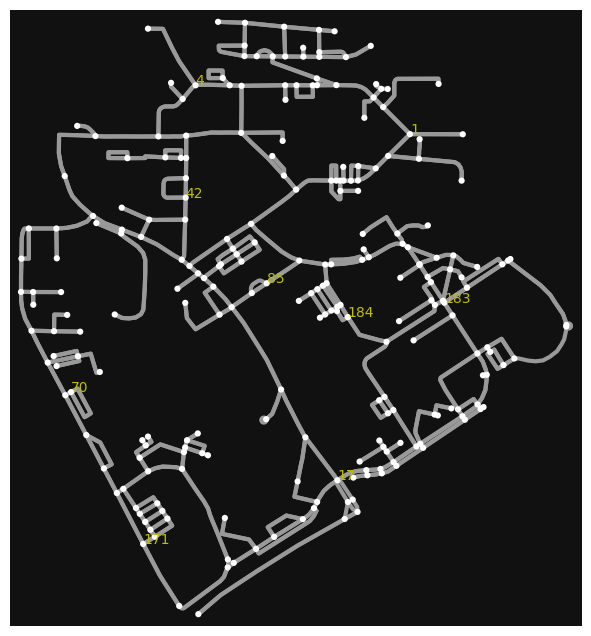

In [37]:
'''
동측 하나가 부족한거같아서 183 추가
도서관(95) 가 좀 애매해서, 자연과학동으로 변경 184
'''

fig, ax = ox.plot_graph(newGG, edge_linewidth=3, node_size=20, show=False, close=False)

node, edge = ox.graph_to_gdfs(newGG)
for i in [84,41,16,0,69,170,3,182,183]: # 참고로 id 랑 index 랑 1 차이남
    text = node.reset_index()["osmid"][i]
    c = node.reset_index()["geometry"][i].centroid
    ax.annotate(text, (c.x, c.y), c="y")


plt.show()

In [38]:
ox.save_graphml(newGG)